# Explorer.ipynb

This notebook is for exploring the two-dimensional model data.

In [1]:
import xarray as xr
import os
from glob import glob
import PVCALC.twoD as PV2D
from importlib import reload
import MITgcmutils.mds as mds
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo
from multiprocessing import Pool
import xrft
from cycler import cycler
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rc('font', family='serif', size='7')
plt.rc('xtick', labelsize='5')
plt.rc('ytick', labelsize='5')
plt.rc('text', usetex=True)
plt.rcParams['axes.titlesize'] = 7

In [2]:
pwd

'/Users/goldsworth/Desktop/JupyterNotebooks'

## Create PV snapshot plots

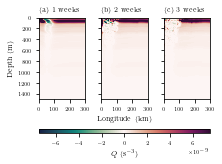

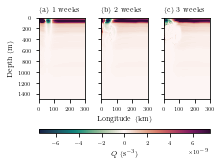

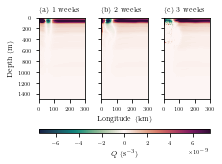

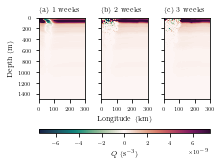

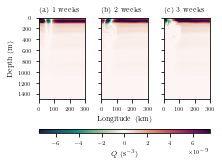

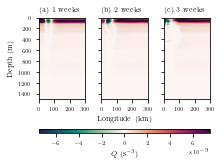

In [3]:
run_list = ['StandardNoSlip', 'ViscousNoSlip', 'ExtraViscousNoSlip', 'StandardFreeSlip','ViscousFreeSlip', 'ExtraViscousFreeSlip']
for run_name in run_list:
    PV_file = 'PV750km' + run_name + '.nc'
    PV_prefix = '/Users/goldsworth/Desktop/ncfiles.nosync/'
    PV_path = os.path.join(PV_prefix, run_name, PV_file)

    out_name = 'PV3DSliceSnapshot' + run_name + '.pdf'
    out_dir = '/Users/goldsworth/Documents/Publications/Paper1/figures/'
    out_path = os.path.join(out_dir, out_name)

    q = xr.open_dataset(PV_path)['potVort']
    q['T'] = q['T'] / 24 / 60 / 60
    Xkm = q['X'] * 1e-3
    Z = -1 * q['Z']
    clim = 0.75e-8

    fig, axs = plt.subplots(2, 3, gridspec_kw={"height_ratios":[1, 0.05]}, figsize=(3.1, 2.3))
    #axs[0].invert_yaxis()

    cax0 = axs[0, 0].pcolormesh(Xkm, Z, q.sel({'T': 7}, method='nearest'), cmap=cmo.curl, vmin=-clim, vmax=clim, rasterized=True, shading='nearest')
    axs[0, 1].pcolormesh(Xkm, Z, q.sel({'T': 14}, method='nearest'), cmap=cmo.curl, vmin=-clim, vmax=clim, rasterized=True, shading='nearest')
    axs[0, 2].pcolormesh(Xkm, Z, q.sel({'T': 21}, method='nearest'), cmap=cmo.curl, vmin=-clim, vmax=clim, rasterized=True, shading='nearest')

    [ax.set_xlim(0, 300) for ax in axs[0]]
    [ax.set_ylim([1500, 0]) for ax in axs[0]]
    [ax.set_yticklabels([]) for ax in axs[0, 1:]]

    axs[0, 1].set_xlabel('Longitude (km)')
    axs[0, 0].set_ylabel('Depth (m)')
    #[ax.set_xticklabels([]) for ax in axs[0, 1:]]

    axs[0, 0].set_facecolor('black')
    axs[0, 1].set_facecolor('black')
    axs[0, 2].set_facecolor('black')

    #axs[0, 0].set_title('2 weeks')
    #axs[0, 1].set_title('4 weeks')
    #axs[0, 2].set_title('6 weeks')
    #axs[0, 0].set_title('(a)', loc='left')
    #axs[0, 1].set_title('(b)', loc='left')
    #axs[0, 2].set_title('(c)', loc='left')

    axs[0, 0].set_title('(a)  1 weeks', loc='left')
    axs[0, 1].set_title('(b)  2 weeks', loc='left')
    axs[0, 2].set_title('(c)  3 weeks', loc='left')


    gs = axs[0, 0].get_gridspec()

    for ax in axs[1]:
        ax.remove()
    axbig = fig.add_subplot(gs[1, :])

    cb = fig.colorbar(cax0, axbig, orientation='horizontal', label='$Q$ (s$^{-3}$)')
    axbig.ticklabel_format(useMathText=True)
    fig.tight_layout()
    fig.savefig(out_path, dpi=1200)
    #plt.savefig('/Users/goldsworth/Documents/Publications/Paper1/figures/VerticalSlice750km.pdf', dpi=1200)